Importa o modelo a ser fatiado e mapeado

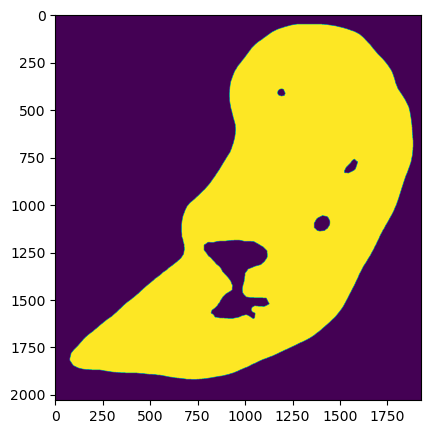

In [11]:
import matplotlib.pyplot as plt
import gui
import files
from timer import Timer

#TODO: encontrar uma forma de jogar os parametros escolhidos DPI e layerHight para o slicing W/images
folders = files.Paths()
path_input, file_name = gui.load_model(folders)
[dpi, layer_height, void_max, internal_max, external_max, n_max] = gui.ask_parameters_input()
if file_name.endswith(".stl") or file_name.endswith(".STL"):
    camadas = files.load_layers_3d(folders, path_input, dpi, layer_height)
else:
    camadas = files.load_layers_2D(folders, path_input, dpi, layer_height)
plt.rcParams["figure.figsize"]=5,5
plt.imshow(camadas[0].original_img)
plt.show()

Paredes Finas

Fase 1: Camada: 0
Criando paredes finas
[3#mErro: nao fechou contorno
Total de [Criando paredes finas] : 4.591938018798828
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.017287492752075195
Total de [Fase 1: Camada: 0] : 4.655721426010132


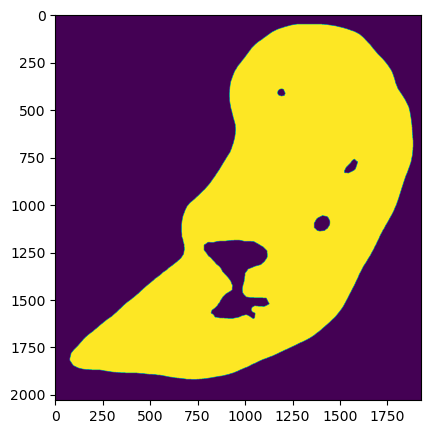

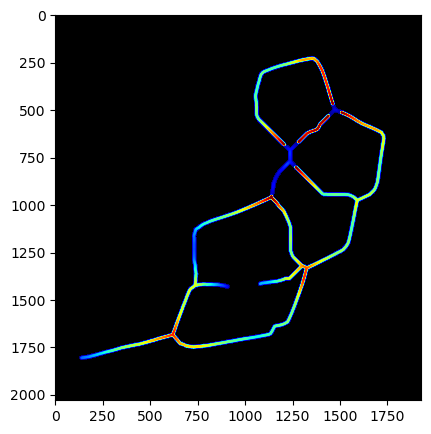

In [12]:
from ploters import mapping_thin_walls, mapping_thin_walls_medialAxis

[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
# from components.layer import Layer
for i,c in enumerate(camadas):
    with Timer("Fase 1: Camada: " + str(i)):
        c.make_thin_walls(nozzle_diam_external, nozzle_diam_internal)
        plt.figure()
        plt.imshow(mapping_thin_walls(c))
        plt.figure()
        cmap = plt.get_cmap("jet")
        cmap.set_under(color='black')
        plt.imshow(mapping_thin_walls_medialAxis(c), cmap=cmap, vmin=0.1)
        